## Yacine Mahdid June 13 2020
The goal of this notebook is to generate all the visualization we need in order to design our poster for OHBM. We need a few and they are outline over [here in the github issue](https://github.com/BIAPT/Envelope-and-phase-based-measures-of-functional-connectivity-consciousness-classification/issues/5)

In [3]:
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from utils import load_pickle

IN_DIR = "/home/yacine/Documents/BIAPT/testing/"
OUT_DIR = f"/home/yacine/Documents/BIAPT/aec_vs_pli_result/"

EPOCHS = ["emf5" "eml5"]
GRAPHS = ["aec" "pli"]
FEATURES = ["func" "wei" "bin" "func-wei" "func-bin"]



4000
4000
4000


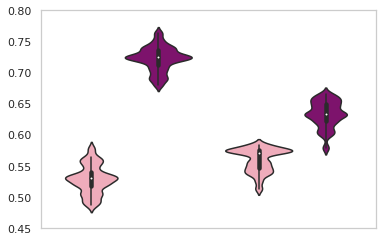

4000
4000
4000


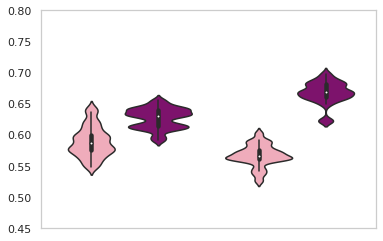

Bootstrap Interval at n=1000 and p < 0.05
(0.5258749033963085, 0.601941466297278)
(0.6222946864316667, 0.6983024051885001)
Binarized, Weighted


In [85]:
# We want to make the violin plot of the distribution between the binary and weighted graph for aec and pli
fig_name = "/home/yacine/Documents/BIAPT/eeg_pain_result/bootstrap_comparison.png"

for graph in ['aec', 'pli']:
    data = {
        'Accuracy': [],
        'Graph Type': [],
        'Condition': []
    }
    for epoch, cur_condition in zip(['emf5','eml5'], ['Deep','Light']):
        bin_bootstrap = load_pickle(f"{IN_DIR}/bootstrap_{graph}_{epoch}_bin.pickle")
        wei_bootstrap = load_pickle(f"{IN_DIR}/bootstrap_{graph}_{epoch}_wei.pickle")

        # I need to first take the data and put it in a dataframe
        bin_label = ['binarized' for x in bin_bootstrap['distribution']]
        wei_label = ['weighted' for x in wei_bootstrap['distribution']]
        condition = [cur_condition for x in wei_bootstrap['distribution']]*2

        data['Accuracy'] = data['Accuracy'] + bin_bootstrap['distribution'] + wei_bootstrap['distribution']
        data['Graph Type'] = data['Graph Type'] + bin_label + wei_label
        data['Condition'] = data['Condition'] + condition

    colors = [(0.98, 0.63, 0.71), (0.56, 0.003, 0.47)]# Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    sns.set_style("whitegrid",{'axes.grid' : False})
    df = pd.DataFrame (data, columns = ['Accuracy','Graph Type', "Condition"])
    ax = sns.violinplot(data=df, x='Condition', y='Accuracy', hue="Graph Type")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set(xticklabels=[])
    ax.legend_.remove()
    ax.set_ylim(0.45, 0.8)

    plt.show()
print("Bootstrap Interval at n=1000 and p < 0.05")
print(bin_bootstrap['interval'])
print(wei_bootstrap['interval'])
print("Binarized, Weighted")

(0.9943406382160708, 0.9035447904652056, 0.8906881968473664)
(0.9904190695886198, 0.8315109573241061, 0.8162706651287966)
(0.9869434832756633, 0.7480046136101499, 0.745836216839677)
(0.981038062283737, 0.6358016147635525, 0.7133564013840831)
(0.9728719723183391, 0.48565936178392927, 0.6596693579392541)
(0.931841599384852, 0.3342714340638216, 0.6172241445597847)
(0.8514878892733564, 0.18745098039215685, 0.5840830449826989)
(0.7127104959630911, 0.03686274509803919, 0.5102652825836217)
(0.5687966166858901, 0.00392156862745098, 0.4788312187620146)
(0.4249288735101884, 0.002829680891964629, 0.4524721261053441)


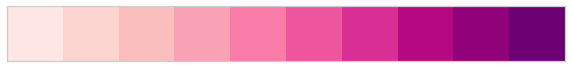

In [67]:
sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)

for color in sequential_colors:
    print(color)